# 모델2 : 맥동성

## 모델구성
- 문제성님 모델

In [13]:
# Tensorflow Check
import tensorflow as tf
from tensorflow.python.client import device_lib
import sys
print(f'Python     : {sys.version.split("|")[0]}')
print(f'Tensorflow : {tf.__version__}')
print(f'TF GPU     : {"True" if device_lib.list_local_devices()[1] else "False"}')

Python     : 3.10.11 
Tensorflow : 2.10.1
TF GPU     : True


In [26]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import sklearn

from tensorflow import keras
from IPython.display import clear_output
import json

# 각종 변수 선언
csv_path = 'D:/coding/aib/GPTeachersDay/TeamProject1/leeyeonjun/Data/binary_classification_data.csv'
EPOCHS = 1000
MB_SIZE = 1024

In [15]:
# 필요한 함수 / 메소드 정의
class CustomCallback(keras.callbacks.Callback):
    """
    사용자 정의 콜백함수
    """
    def on_train_begin(self, logs=None):
        print("Starting training")

    def on_train_end(self, logs=None):
        print("End training")
        # clear_output(wait=True)

    def on_epoch_end(self, epoch, logs=None):
        if epoch % 100 == 0:print()
        if epoch % 10 == 0:
            print(f'{epoch} / ', end='')

def load_data(csv_path, TRAIN_RATIO=0.8):
    global X, y, X_train, X_test, y_train, y_test, df
    
    # 데이터셋 로드
    df = pd.read_csv(csv_path)
    
    # 학습 데이터 분리
    X = df.drop('target_class', axis=1)
    y = df['target_class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_RATIO, random_state = 83)
    
    # 표준화
    scaler = StandardScaler() 
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test = pd.DataFrame(X_test, columns=X.columns)

def get_model(dout=0.1, output_bias=None):
    
    if output_bias is not None:
        output_bias = keras.initializers.Constant(output_bias)
    
    regularizer=keras.regularizers.L1L2(l1=0.001, l2=0.001)
    
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(dout),
            tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizer),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(dout),
            tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizer),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(dout),
            tf.keras.layers.Dense(6, activation='relu', kernel_regularizer=regularizer),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
    
    METRICS = [
            keras.metrics.TruePositives(name='tp'),
            keras.metrics.FalsePositives(name='fp'),
            keras.metrics.TrueNegatives(name='tn'),
            keras.metrics.FalseNegatives(name='fn'), 
            keras.metrics.BinaryAccuracy(name='accuracy'),
            keras.metrics.Precision(name='precision'),
            keras.metrics.Recall(name='recall'),
            keras.metrics.F1Score(name='f1_score'),
            keras.metrics.AUC(name='auc'),
            keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
            ]
    
    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=METRICS
        )
    return model

In [16]:
load_data(csv_path)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train.describe()

(14318, 8) (3580, 8) (14318,) (3580,)


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,14318.000000,1.431800e+04
mean,4.937771e-17,1.985033e-17,4.168570e-17,1.215833e-17,2.679795e-17,4.081725e-17,0.000000,6.252855e-17
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035,1.000035e+00
min,-4.120136e+00,-3.207467e+00,-2.235779e+00,-5.770065e-01,-4.188843e-01,-9.702420e-01,-2.481473,-1.010623e+00
25%,-4.023072e-01,-6.137926e-01,-4.266299e-01,-3.186363e-01,-3.605269e-01,-6.075160e-01,-0.564632,-6.588786e-01
50%,1.541275e-01,6.343979e-02,-2.415434e-01,-2.553492e-01,-3.306753e-01,-4.016201e-01,0.028258,-2.053026e-01
75%,6.282295e-01,6.600747e-01,-6.613046e-04,-1.334971e-01,-2.407483e-01,1.029766e-01,0.531815,3.272613e-01
max,3.198297e+00,6.588416e+00,7.212419e+00,1.092778e+01,6.832434e+00,4.346189e+00,5.834657,1.022672e+01


In [17]:
neg, pos = np.bincount(y)
initial_bias = np.log([pos/neg])
initial_bias

array([-2.2945603])

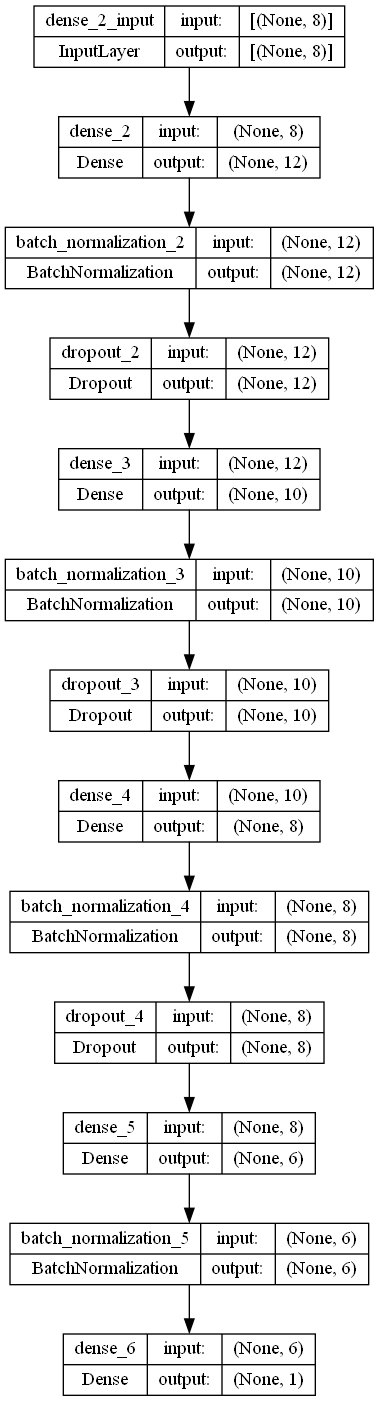

In [19]:
model = get_model(output_bias=initial_bias)
keras.utils.plot_model(model, show_shapes=True, to_file='model2_model.png')

In [20]:
# 얼리스타핑
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss'
                                        , min_delta=0.000001
                                        , mode='min'
                                        , patience=EPOCHS//2)

# 모델 저장
checkpoint_path = 'model2.h5'
checkpoint = keras.callbacks.ModelCheckpoint(
                                        checkpoint_path
                                        , monitor='val_loss'
                                        , verbose=0
                                        , mode = 'min'
                                        , save_best_only=True
                                        , save_weights_only=True)

# 학습률 조정
rlrp = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=20, mode='min')

# 모델 학습
history = model.fit(X_train, y_train
                , batch_size=MB_SIZE
                , validation_split = 0.2
                , verbose=0
                , epochs=EPOCHS
                , callbacks=[earlystop, checkpoint, CustomCallback(), rlrp]
                )

# 가장 성능이 좋았던 모델을 가져와 평가
model.load_weights(checkpoint_path)
results = model.evaluate(X_test, y_test)
print(f'Test Loss : {results[0]:.3f} / Recall : {results[7]:.3f} / Accuracy : {results[5]:.3f}')

Starting training

0 / 10 / 20 / 30 / 40 / 50 / 60 / 70 / 80 / 90 / 
100 / 110 / 120 / 130 / 140 / 150 / 160 / 170 / 180 / 190 / 
200 / 210 / 220 / 230 / 240 / 250 / 260 / 270 / 280 / 290 / 
300 / 310 / 320 / 330 / 340 / 350 / 360 / 370 / 380 / 390 / 
400 / 410 / 420 / 430 / 440 / 450 / 460 / 470 / 480 / 490 / 
500 / 510 / 520 / 530 / 540 / 550 / 560 / 570 / 580 / 590 / 
600 / 610 / 620 / 630 / 640 / 650 / 660 / 670 / 680 / 690 / 
700 / 710 / 720 / 730 / 740 / 750 / End training
112/112 [==============================] - 2s 13ms/step - loss: 0.0747 - tp: 291.0000 - fp: 21.0000 - tn: 3218.0000 - fn: 50.0000 - accuracy: 0.9802 - precision: 0.9327 - recall: 0.8534 - auc: 0.9767 - prc: 0.9355
Test Loss : 0.075 / Recall : 0.853 / Accuracy : 0.980


In [28]:
model.evaluate(X_test, y_test, verbose=0)

[0.07467469573020935,
 291.0,
 21.0,
 3218.0,
 50.0,
 0.9801676273345947,
 0.932692289352417,
 0.8533724546432495,
 0.976703941822052,
 0.9355432987213135]

In [30]:
# 모델 평가
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.3).astype(int)

precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print(f'Accuracy: {results[5]:.3f}\nLoss: {results[0]:.3f}\nPrecision: {precision:.3f}\nRecall: {recall:.3f}\nF1 Score: {f1:.3f}')

112/112 [==============================] - 1s 5ms/step
Accuracy: 0.980
Loss: 0.075
Precision: 0.897
Recall: 0.871
F1 Score: 0.884


In [21]:
# 모델 훈련기록 저장
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist = hist.set_index('epoch')
hist.to_json('model2.json')

In [22]:
# 모델 훈련기록 불러오기
with open('model2.json') as json_file:
    json_file = json.loads(json_file.read())
model1_hist = pd.DataFrame(json_file)
model1_hist

,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,prc,...,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,val_prc,lr
0,0.820190,906.0,4665.0,5762.0,121.0,0.582155,0.162628,0.882181,0.691033,0.128859,...,4.0,39.0,2554.0,267.0,0.893156,0.093023,0.014760,0.571154,0.098623,1.000000e-03
1,0.761782,896.0,4599.0,5828.0,131.0,0.587044,0.163057,0.872444,0.766520,0.205635,...,18.0,1.0,2592.0,253.0,0.911313,0.947368,0.066421,0.788446,0.294241,1.000000e-03
2,0.717253,921.0,4237.0,6190.0,106.0,0.620831,0.178558,0.896787,0.844513,0.380739,...,40.0,0.0,2593.0,231.0,0.919344,1.000000,0.147601,0.873184,0.546133,1.000000e-03
3,0.686284,916.0,3715.0,6712.0,111.0,0.665968,0.197797,0.891918,0.877668,0.531090,...,66.0,0.0,2593.0,205.0,0.928422,1.000000,0.243542,0.909888,0.738424,1.000000e-03
4,0.657735,914.0,3117.0,7310.0,113.0,0.718002,0.226743,0.889971,0.896995,0.634149,...,88.0,0.0,2593.0,183.0,0.936103,1.000000,0.324723,0.924214,0.788183,1.000000e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.072139,880.0,86.0,10341.0,147.0,0.979658,0.910973,0.856865,0.978160,0.928804,...,240.0,23.0,2570.0,31.0,0.981145,0.912548,0.885609,0.988934,0.950556,6.710887e-22
753,0.071637,882.0,82.0,10345.0,145.0,0.980182,0.914938,0.858812,0.977811,0.928841,...,240.0,23.0,2570.0,31.0,0.981145,0.912548,0.885609,0.988969,0.950537,6.710887e-22
754,0.071751,890.0,75.0,10352.0,137.0,0.981491,0.922280,0.866602,0.977868,0.928847,...,240.0,23.0,2570.0,31.0,0.981145,0.912548,0.885609,0.988965,0.950566,6.710887e-22
755,0.072669,885.0,99.0,10328.0,142.0,0.978959,0.899390,0.861733,0.976057,0.926167,...,240.0,23.0,2570.0,31.0,0.981145,0.912548,0.885609,0.988943,0.950723,6.710887e-22


In [23]:
# 최적모델 훈련기록 확인하기
model1_hist.sort_values(by=['val_recall'], ascending=False).iloc[:5,10:]

,val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,val_prc,lr
202,0.065146,243.0,24.0,2569.0,28.0,0.981844,0.910112,0.896679,0.984733,0.946758,0.001000
206,0.064875,243.0,24.0,2569.0,28.0,0.981844,0.910112,0.896679,0.987225,0.949694,0.001000
197,0.065344,241.0,23.0,2570.0,30.0,0.981494,0.912879,0.889299,0.987631,0.948679,0.001000
290,0.063949,241.0,24.0,2569.0,30.0,0.981145,0.909434,0.889299,0.988891,0.950188,0.000008
280,0.064042,241.0,24.0,2569.0,30.0,0.981145,0.909434,0.889299,0.988878,0.950319,0.000008


112/112 [==============================] - 1s 4ms/step


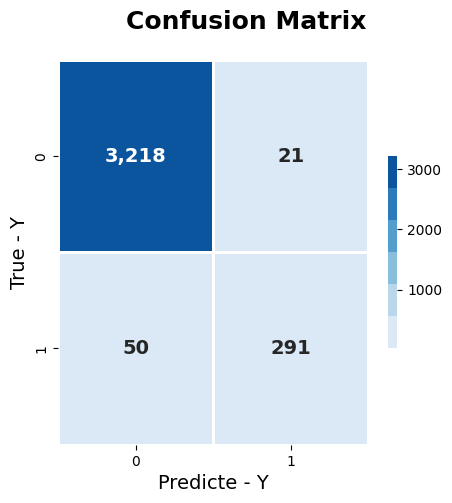

In [24]:
c_mat = confusion_matrix(y_test, model.predict(X_test).round())

# 히트맵을 그린다
fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle('Confusion Matrix', fontsize = 18, fontweight = 'bold')
sns.heatmap(c_mat, 
            cmap = sns.color_palette('Blues'), 
            annot = True,
            annot_kws = {'fontweight':'bold','size':14},
            fmt=',.0f',
            linewidths = 2,
            cbar_kws = {'shrink': .5},
           )

plt.xlabel('Predicte - Y', fontsize = 14)
plt.ylabel('True - Y', fontsize = 14)
plt.show()

fig.savefig('model2_cm.png', dpi=80, bbox_inches='tight')

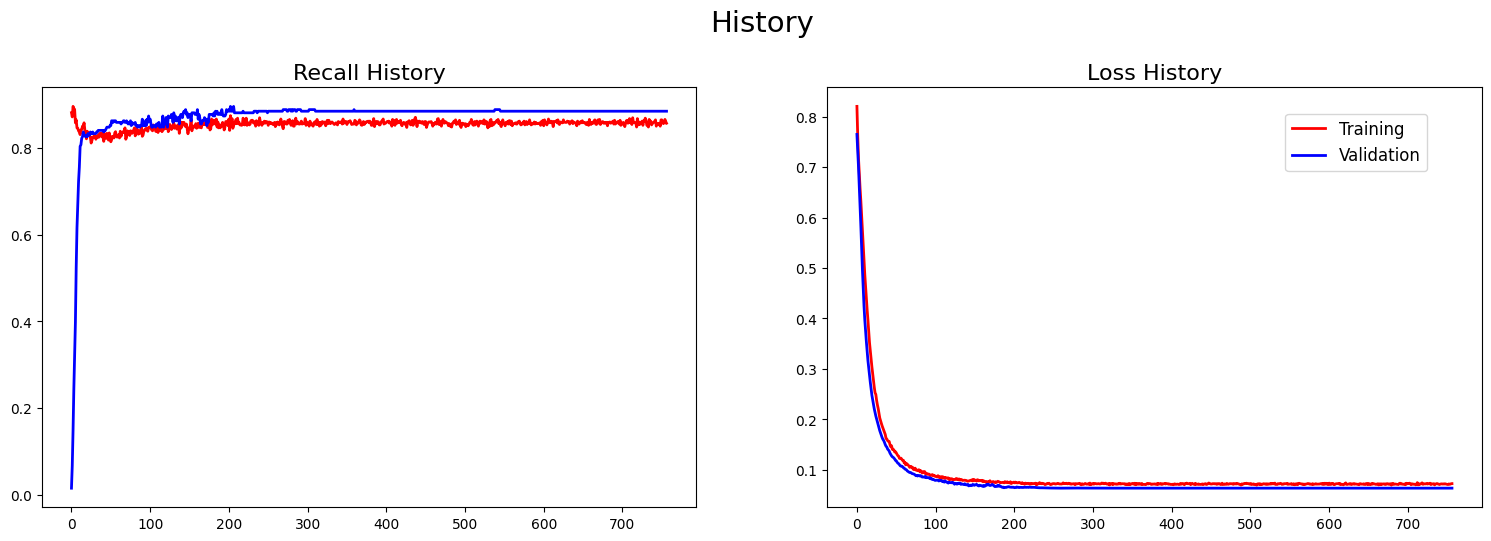

In [25]:
fig = plt.figure(figsize=(16, 6))
fig.suptitle('History', fontsize = 21)

# Recall Plot
ax = plt.subplot(1, 2, 1)
plt.title(f'Recall History', fontsize = 16, y = 1)
plt.plot(history.history["recall"], color='r', linewidth=2, label="Training")
plt.plot(history.history["val_recall"], color='b', linewidth=2, label="Validation")

# Loss Plot
ax = plt.subplot(1, 2, 2)
plt.title(f'Loss History', fontsize = 16, y = 1)
plt.plot(history.history["loss"], color='r', linewidth=2, label="Training")
plt.plot(history.history["val_loss"], color='b', linewidth=2, label="Validation")

plt.legend(fontsize=12, loc=(0.7, 0.8))
plt.subplots_adjust(right=0.95, left=0.05, top=0.85, bottom=0.15, wspace=0.2, hspace=0.2)
plt.show()

fig.savefig('model2_history.png', dpi=80, bbox_inches='tight')